In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from matplotlib.colors import ListedColormap
from scipy import linalg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1"

 dataset_1.csv	'Dataset 1 description.docx'


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1/dataset_1.csv", sep = '\t', header=None)
Y = np.array(data[64])
Y = Y.astype('int64')
n_components = 2

In [ ]:
i = 0
while i < 65:
  lis = list(data.loc[:, i])
  if statistics.variance(lis) == 0:
    del(data[i])
  i += 1
del(data[64])

Here we remove all the columns whose variance is equal to 0. This is done to clean the data as these columns won't affect the classification anyway but they will hinder LDA

In [ ]:
lis = list(range(56))
data.columns = lis

Renaming the columns 

In [ ]:
class LDA:
  def __init__(self, X, y):
    self.X = X
    self.y = y
  def fit(self):
    self.Sw = self.get_Sw(self.X, self.y)
    self.Sb = self.get_Sb(self.X)
    Sw_inv = np.linalg.pinv(self.Sw)
    df = Sw_inv@self.Sb
    w, v = linalg.eigh(self.Sb, self.Sw)
    w = np.real(w)
    v = np.real(v)
    v = v[:, np.argsort(w)[::-1]]
    fin = self.X@v
    fin = fin[:, :n_components]
    return fin


  def get_Sw(self, X, y):
    classes = np.unique(y)
    cov = np.zeros(shape=(X.shape[1], X.shape[1]))
    for idx, group in enumerate(classes):
        Xg = X[y == group, :]
        cov += np.cov(Xg.T)
    return cov


  def get_Sb(self, X):
    St = np.cov(X.T)
    Sb = St - self.Sw
    return Sb

In [ ]:
clf = LDA(np.array(data), np.array(Y))
XX_new = clf.fit()
print(XX_new)

[[-3.7946095  -0.56443577]
 [ 2.84926293  1.51513175]
 [ 2.42636783 -1.89295204]
 ...
 [ 2.62275695 -2.22112847]
 [ 2.05965369 -1.73112941]
 [-2.96582988 -0.30897495]]


Text(0.5, 1.0, 'LDA after no preprocessing')

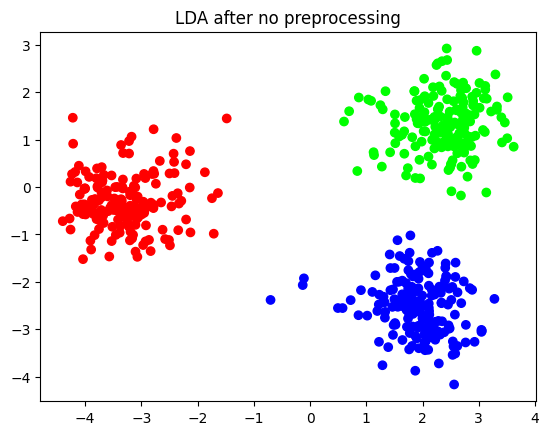

In [ ]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(XX_new[:, 0], XX_new[:, 1], c=Y, cmap=cmap_bold)
plt.title("LDA after no preprocessing")

As we can see, the LDA code is working and seperating the classes from each other in the 2-d space, now we will test it with different methods of preprocessing for data

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1/dataset_1.csv", sep = '\t', header=None)
Y = np.array(data[64])
Y = Y.astype('int64')
n_components = 2
i = 0
while i < 65:
  lis = list(data.loc[:, i])
  if statistics.variance(lis) == 0:
    del(data[i])
  i += 1
del(data[64])
lis = list(range(56))
data.columns = lis

In [ ]:
data = np.array(data)
for j in range(data.shape[1]):
  data[:,j] = (data[:,j] - data[:,j].min()) / (data[:,j].max() - data[:,j].min())
print(data)

[[0.     0.3125 0.8125 ... 0.     0.     0.    ]
 [0.     0.     0.75   ... 0.625  0.     0.    ]
 [0.     0.     0.25   ... 1.     0.5625 0.    ]
 ...
 [0.2    0.625  0.8125 ... 0.625  0.5625 0.    ]
 [0.     0.9375 0.8125 ... 0.375  0.125  0.    ]
 [0.     0.375  1.     ... 0.375  0.     0.    ]]


Text(0.5, 1.0, 'LDA after min-max normalisation')

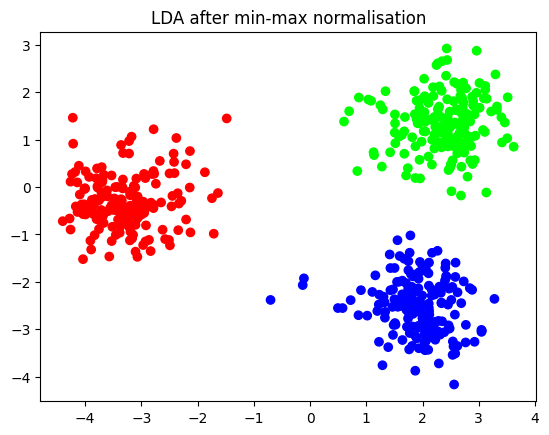

In [ ]:
clf = LDA(np.array(data), np.array(Y))
XX_new = clf.fit()
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(XX_new[:, 0], XX_new[:, 1], c=Y, cmap=cmap_bold)
plt.title("LDA after min-max normalisation")

As we can see, applying the min-max normalisation does not change the LDA transformation

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1/dataset_1.csv", sep = '\t', header=None)
Y = np.array(data[64])
Y = Y.astype('int64')
n_components = 2
i = 0
while i < 65:
  lis = list(data.loc[:, i])
  if statistics.variance(lis) == 0:
    del(data[i])
  i += 1
del(data[64])
lis = list(range(56))
data.columns = lis

In [ ]:
data = np.array(data)
for j in range(data.shape[1]):
  data[:,j] = (data[:,j] - np.mean(data[:,j])) / (statistics.variance(data[:,j])**0.5)
print(data)

[[-0.35365972 -0.08376457  0.18684175 ... -1.54508242 -0.67352419
  -0.35361364]
 [-0.35365972 -1.115452   -0.0298624  ...  0.251992   -0.67352419
  -0.35361364]
 [-0.35365972 -1.115452   -1.76349555 ...  1.33023665  0.93474775
  -0.35361364]
 ...
 [ 0.75695589  0.94792287  0.18684175 ...  0.251992    0.93474775
  -0.35361364]
 [-0.35365972  1.97961031  0.18684175 ... -0.46683777 -0.31613043
  -0.35361364]
 [-0.35365972  0.12257292  0.83695418 ... -0.46683777 -0.67352419
  -0.35361364]]


Text(0.5, 1.0, 'LDA after standardization to normal distribution')

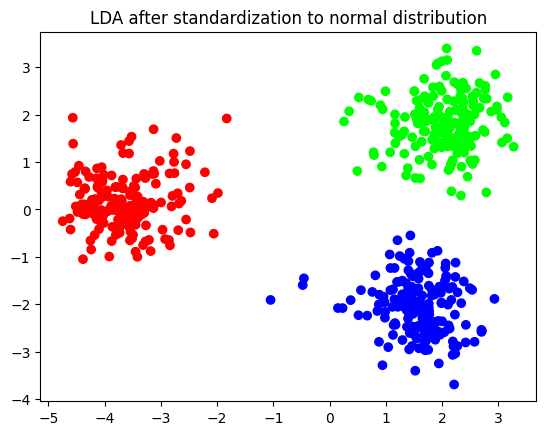

In [ ]:
clf = LDA(np.array(data), np.array(Y))
XX_new = clf.fit()
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(XX_new[:, 0], XX_new[:, 1], c=Y, cmap=cmap_bold)
plt.title("LDA after standardization to normal distribution")

Even standardization to a normal ditribution had no effect on the dimensionality reduction done by LDA

In [ ]:
from sklearn.decomposition import PCA
data = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1/dataset_1.csv", sep = '\t', header=None)
Y = np.array(data[64])
Y = Y.astype('int64')
n_components = 2
i = 0
while i < 65:
  lis = list(data.loc[:, i])
  if statistics.variance(lis) == 0:
    del(data[i])
  i += 1
del(data[64])
lis = list(range(56))
data.columns = lis


Text(0.5, 1.0, 'PCA without preprocessing')

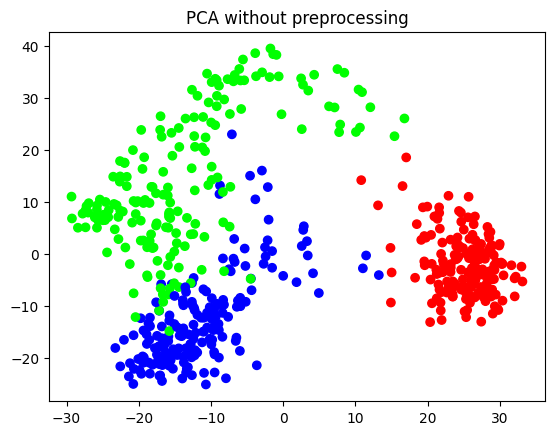

In [ ]:
pca = PCA(n_components=2)
pca.fit(np.array(data))
XX_new = pca.transform(np.array(data))
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(XX_new[:, 0], XX_new[:, 1], c=Y, cmap=cmap_bold)
plt.title("PCA without preprocessing")

In [ ]:
from sklearn.decomposition import PCA
data = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset1/dataset_1.csv", sep = '\t', header=None)
Y = np.array(data[64])
Y = Y.astype('int64')
n_components = 2
i = 0
while i < 65:
  lis = list(data.loc[:, i])
  if statistics.variance(lis) == 0:
    del(data[i])
  i += 1
del(data[64])
lis = list(range(56))
data.columns = lis
data = np.array(data)
for j in range(data.shape[1]):
  data[:,j] = (data[:,j] - np.mean(data[:,j])) / (statistics.variance(data[:,j])**0.5)
print(data)

[[-0.35365972 -0.08376457  0.18684175 ... -1.54508242 -0.67352419
  -0.35361364]
 [-0.35365972 -1.115452   -0.0298624  ...  0.251992   -0.67352419
  -0.35361364]
 [-0.35365972 -1.115452   -1.76349555 ...  1.33023665  0.93474775
  -0.35361364]
 ...
 [ 0.75695589  0.94792287  0.18684175 ...  0.251992    0.93474775
  -0.35361364]
 [-0.35365972  1.97961031  0.18684175 ... -0.46683777 -0.31613043
  -0.35361364]
 [-0.35365972  0.12257292  0.83695418 ... -0.46683777 -0.67352419
  -0.35361364]]


Text(0.5, 1.0, 'PCA with standardization to normal distribution')

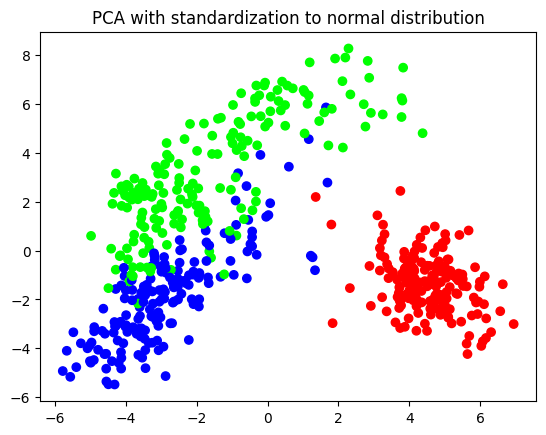

In [ ]:
pca = PCA(n_components=2)
pca.fit(np.array(data))
XX_new = pca.transform(np.array(data))
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(XX_new[:, 0], XX_new[:, 1], c=Y, cmap=cmap_bold)
plt.title("PCA with standardization to normal distribution")

In [ ]:
class Bayes_covI:
    def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)

    def predict(self, X):
        y_pred = []
        for x in X:
            probs = []
            for i in range(self.n_classes):
                prior = np.log(self.priors[i])
                mean = self.means[i]
                likelihood = -(np.dot(x-mean,x-mean)/2)
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

class Bayes_covsame:
  def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None
        self.cov = None
        self.invcov = None
  
  def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))
        self.cov = np.zeros((X.shape[1],X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)
            self.cov += np.cov(X_i.T) / self.n_classes
            
        self.invcov = np.linalg.inv(self.cov)

  def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            probs = []
            for j in range(self.n_classes):
                prior = np.log(self.priors[j])
                mean = self.means[j]
                likelihood = -0.5 * ((X[i] - self.means[j]).T @ self.invcov @ (X[i] - self.means[j]))
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

class Bayes_differentcov:
  def __init__(self):
        self.n_classes = None
        self.priors = None
        self.means = None
        self.cov = None

  def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.priors = np.zeros(self.n_classes)
        self.means = np.zeros((self.n_classes, X.shape[1]))
        self.cov = np.zeros((self.n_classes,X.shape[1], X.shape[1]))

        for i in range(self.n_classes):
            X_i = X[y == i]
            self.priors[i] = len(X_i) / len(X)
            self.means[i] = np.mean(X_i, axis=0)
            self.cov[i] = np.cov(X_i.T)

  def predict(self, X):
        y_pred = []
        for x in X:
            probs = []
            for i in range(self.n_classes):
                prior = np.log(self.priors[i])
                mean = self.means[i]
                var = self.cov[i]
                det = np.linalg.det(var)
                inv = np.linalg.inv(var)
                likelihood = -0.5*np.log(det)- 0.5*((x - self.means[i]).T @ inv @ (x - self.means[i]))
                posterior = likelihood + prior
                probs.append(posterior)
            y_pred.append(np.argmax(probs))
        return np.array(y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX_new, np.array(Y), test_size=0.2, random_state=42)


In [ ]:
def binary_confusion_matrix(y_pred, y_check):
    t1, t2, t3, t4 = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] == 0 and y_check[i] == 0:
            t1 += 1
        elif y_pred[i] == 0 and y_check[i] == 1:
            t2 += 1
        elif y_pred[i] == 1 and y_check[i] == 0:
            t3 += 1
        elif y_pred[i] == 1 and y_check[i] == 1:
            t4 += 1
    return np.array([[t1, t2], [t3, t4]])

def confusion_matrix(y_pred, y_check):
    number = np.unique(np.concatenate((y_check, y_pred)))
    n_classes = len(number)
    cm = np.zeros((n_classes, n_classes),dtype = int)
    for i, label_i in enumerate(number):
        for j, label_j in enumerate(number):
            cm[i, j] = np.sum((y_check == label_i) & (y_pred == label_j))
    return cm

The confusion matrix for training data is :


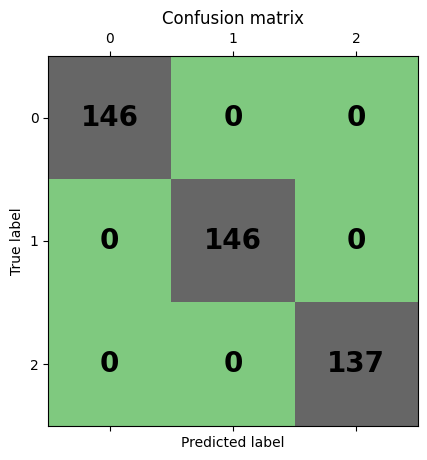


The confusion matrix for test data is :


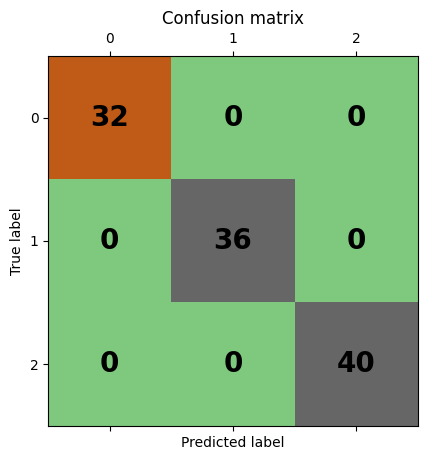

In [ ]:
#Training of part b
#creating a model using training data and covariance = I
BB1 = Bayes_covI()
BB1.fit(X_train, y_train)

#checking for accuracy of model on training data set
Yb_pred = BB1.predict(X_train)
Ysb_pred = BB1.predict(X_test)
#Confusion matrix for part b
cm = confusion_matrix(Yb_pred,y_train)
print("The confusion matrix for training data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = confusion_matrix(Ysb_pred,y_test)
print("\nThe confusion matrix for test data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


PLOT :


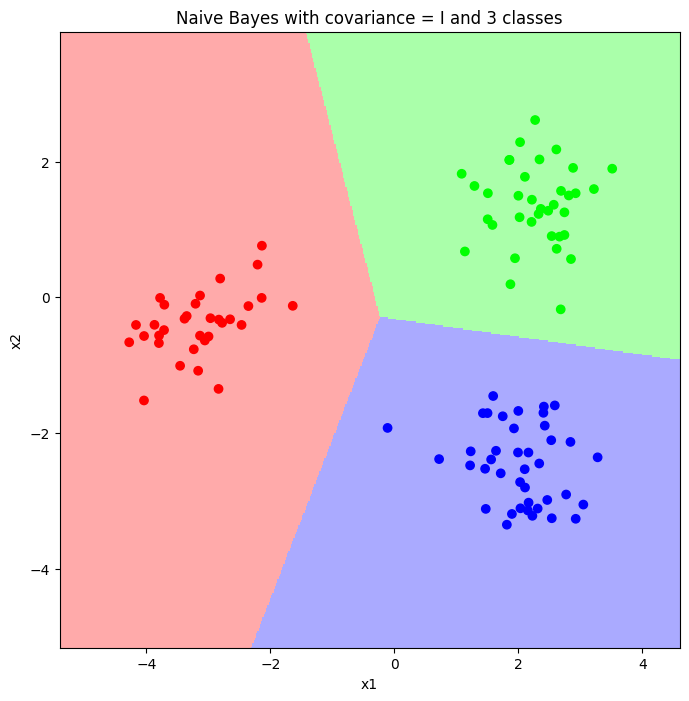

In [ ]:
#Plot for part a
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
#plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with covariance = I and 3 classes")
plt.xlabel('x1')
plt.ylabel('x2')

print()
print("PLOT :")

plt.show()

The confusion matrix for training data is :


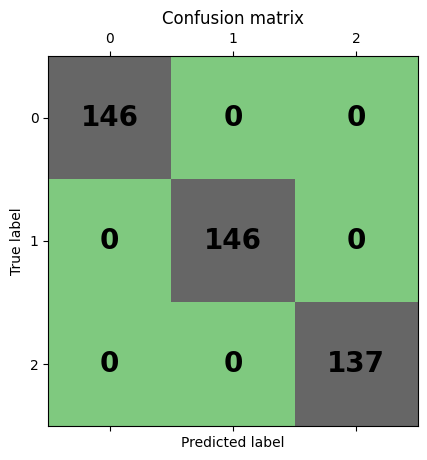


The confusion matrix for test data is :


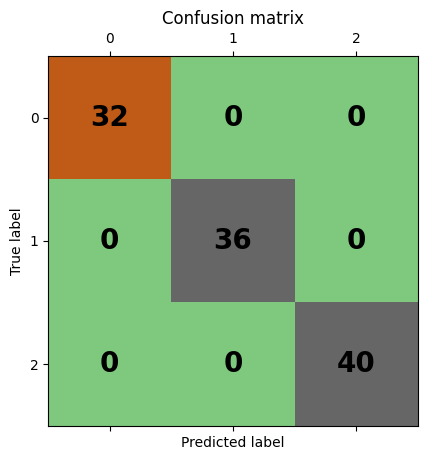

In [ ]:
#Training of part b
#creating a model using training data and covariance = I
BB1 = Bayes_covsame()
BB1.fit(X_train, y_train)

#checking for accuracy of model on training data set
Yb_pred = BB1.predict(X_train)
Ysb_pred = BB1.predict(X_test)
#Confusion matrix for part b
cm = confusion_matrix(Yb_pred,y_train)
print("The confusion matrix for training data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = confusion_matrix(Ysb_pred,y_test)
print("\nThe confusion matrix for test data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


PLOT :


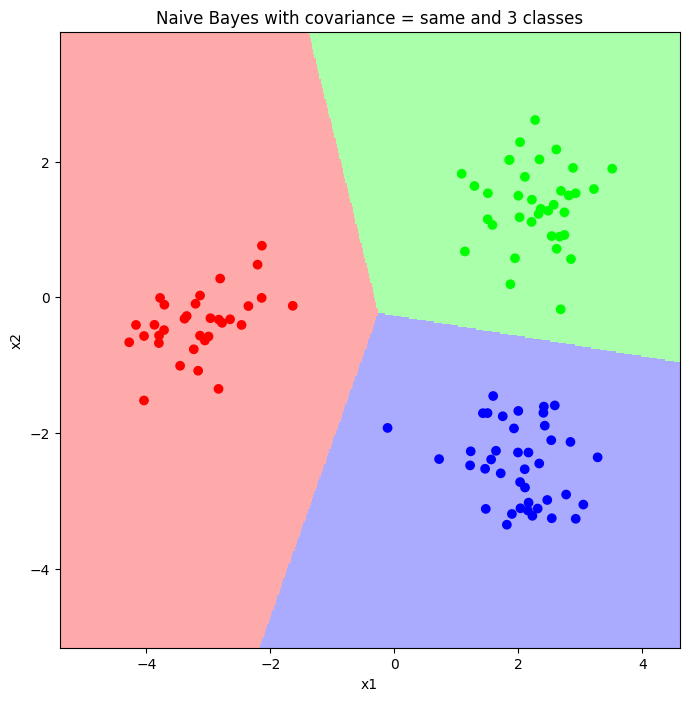

In [ ]:
#Plot for part a
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
#plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with covariance = same and 3 classes")
plt.xlabel('x1')
plt.ylabel('x2')

print()
print("PLOT :")

plt.show()

The confusion matrix for training data is :


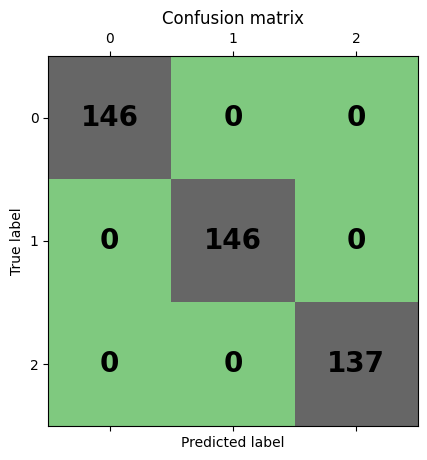


The confusion matrix for test data is :


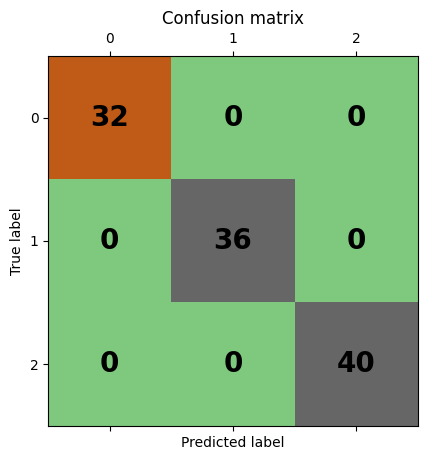

In [ ]:
#Training of part b
#creating a model using training data and covariance = I
BB1 = Bayes_differentcov()
BB1.fit(X_train, y_train)

#checking for accuracy of model on training data set
Yb_pred = BB1.predict(X_train)
Ysb_pred = BB1.predict(X_test)
#Confusion matrix for part b
cm = confusion_matrix(Yb_pred,y_train)
print("The confusion matrix for training data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm = confusion_matrix(Ysb_pred,y_test)
print("\nThe confusion matrix for test data is :")
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


PLOT :


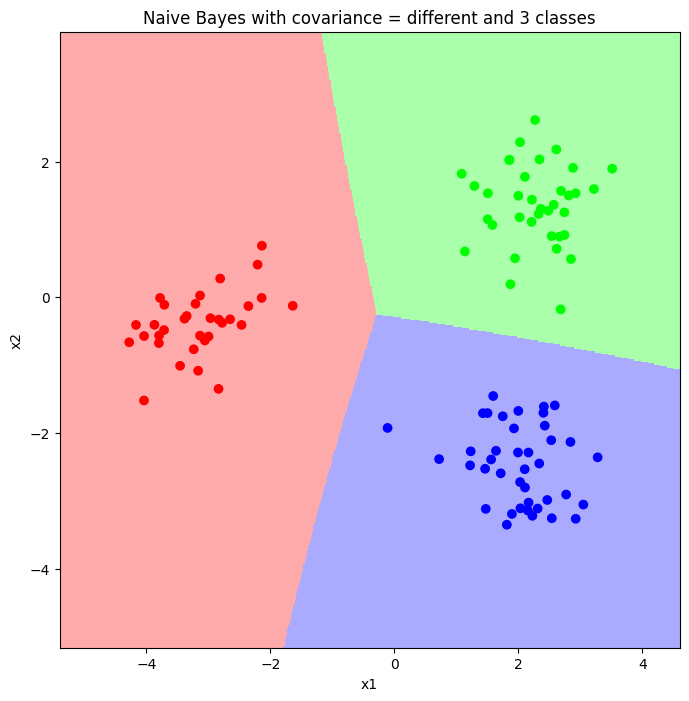

In [ ]:
#Plot for part a
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = BB1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
#plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes with covariance = different and 3 classes")
plt.xlabel('x1')
plt.ylabel('x2')

print()
print("PLOT :")

plt.show()